# About the Dataset

Novel DNA sequencing technologies have proliferated over the past two decades. Continual improvements in “next-generation sequencing” (NGS) and “third-generation sequencing” (TGS) have increased the fidelity and rate of sequencing, but it still takes hours or days to obtain complete sequences. Furthermore, there are some diagnostic applications in which very rapid identification of a particular gene or genetic species becomes essential, while identification of all genes is not necessary. For example, in patients with septic shock from bacterial infections, identification of antibiotic-resistance genes is essential because the mortality rate increases 7.6% per hour of delay in administering correct antibiotics. Unfortunately, it takes more than 24 h to grow up the bacteria recovered from the blood of an infected patient, identify the species, and then determine to which antibiotics the organism is resistant, leading to a very high mortality rate for such infections.

Bacterial antibiotic resistance is becoming a significant health threat, and rapid identification of antibiotic-resistant bacteria is essential to save lives and reduce the spread of antibiotic resistance.

# Goal

To create a machine learning algorithm that classifies 10 different bacteria species using the data from a genomic analysis technique by comparison to available bacterial DNA sequences.

[link to kaggle upload](https://www.kaggle.com/datasets/gauravduttakiit/genetic-bacteria-identification)

Not much information is given on what the columns actually represent, but the uploader was kind enough to split the dataset.
That being said, let's upload the train and test sets but only peak at the training set. We will save the test set for something else.

In [2]:
#importing libraries (others will be uploaded as needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_file = 'genetic_bacteria_train_dataset.csv'

#create train dataframe
df_train = pd.read_csv(train_file)
df_train

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,197019,4.630000e-08,2.460000e-06,3.080000e-06,0.000063,0.000150,1.296740e-04,0.000110,0.000074,0.000003,...,0.000040,0.000030,0.000043,0.000055,0.000028,0.000001,0.000005,9.460000e-06,4.630000e-08,Salmonella_enterica
1,28056,-9.540000e-07,-5.540000e-06,3.080000e-06,0.000048,0.000087,3.870000e-05,0.000055,0.000041,-0.000009,...,0.000116,0.000068,0.000142,0.000125,0.000093,0.000009,0.000012,3.250000e-05,4.630000e-08,Escherichia_coli
2,8210,-9.540000e-07,1.050000e-05,1.710000e-05,-0.000004,-0.000020,7.970000e-05,-0.000030,0.000036,-0.000043,...,0.000054,0.000097,0.000064,0.000114,-0.000003,-0.000010,0.000021,4.630000e-07,-9.540000e-07,Streptococcus_pneumoniae
3,98476,4.630000e-08,1.460000e-06,8.470000e-08,0.000008,0.000030,2.970000e-05,0.000036,0.000022,0.000003,...,0.000048,0.000025,0.000039,0.000042,0.000019,0.000004,0.000002,4.460000e-06,4.630000e-08,Escherichia_coli
4,166342,-9.540000e-07,4.630000e-07,-1.290000e-05,0.000036,0.000060,-3.260000e-07,-0.000040,0.000066,-0.000033,...,0.000134,0.000087,0.000134,0.000134,0.000037,0.000010,0.000010,4.050000e-05,-9.540000e-07,Escherichia_fergusonii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,105992,-9.540000e-07,-9.540000e-06,-4.290000e-05,-0.000114,0.000800,1.759674e-03,-0.000200,0.001886,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-9.540000e-06,-9.540000e-07,Klebsiella_pneumoniae
23996,44666,2.050000e-06,-4.540000e-06,-2.190000e-05,-0.000072,-0.000116,-1.483260e-04,-0.000117,-0.000066,-0.000022,...,0.000920,0.000559,0.001253,0.001685,0.001240,0.000180,0.000271,3.074630e-04,4.630000e-08,Campylobacter_jejuni
23997,3294,-9.540000e-07,-9.540000e-06,-4.290000e-05,-0.000114,-0.000200,-2.403260e-04,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,0.009957,-0.000010,-0.000010,-9.540000e-06,-9.540000e-07,Bacteroides_fragilis
23998,68080,-9.540000e-07,-8.540000e-06,-4.090000e-05,-0.000112,-0.000194,-2.263260e-04,-0.000192,-0.000110,-0.000043,...,0.000551,0.000340,0.000846,0.001073,0.001040,0.000056,0.000110,1.664630e-04,-9.540000e-07,Staphylococcus_aureus


The data seems to be on differing scales even within columns, and it looks like we're provided a target column as well.  Let's take a look at the data a little further.

In [3]:
print(df_train.info())
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 52.7+ MB
None
(24000, 288)


Looks to be a fairly large dataset, so a dimensionality reduction may be necessary. The row_id column may not be serving a purpose than for identification. Let's remove it and separate the target column from the dataframe.

In [4]:
#removing row_id column
row_id = df_train['row_id'] #saving column just in case.
train_targets = df_train['target']
label_count = len(train_targets.unique())
print("There are " + str(label_count) + " labels")
df_train.drop(['row_id', 'target'], inplace=True, axis=1)


There are 10 labels


Since we're given targets already, this changes the initial approach I thought I should take, going from an unsupervised model to a supervised model. Before we get there, there's some steps to take beforehand.

### Scaling

There are a lot of columns, but before a dimensionality reduction is performed, let's scale the data.

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [6]:
df_train_scaled = ss.fit_transform(df_train)

Now that the data is scaled, a dimensionality reduction can be performed. Principal component analysis (PCA) will be used. The minimum number of dimensions should be kept to explain at least 90% of the dataset's variance.

### Principal Component Analysis

In [7]:
from sklearn.decomposition import PCA
pca = PCA()

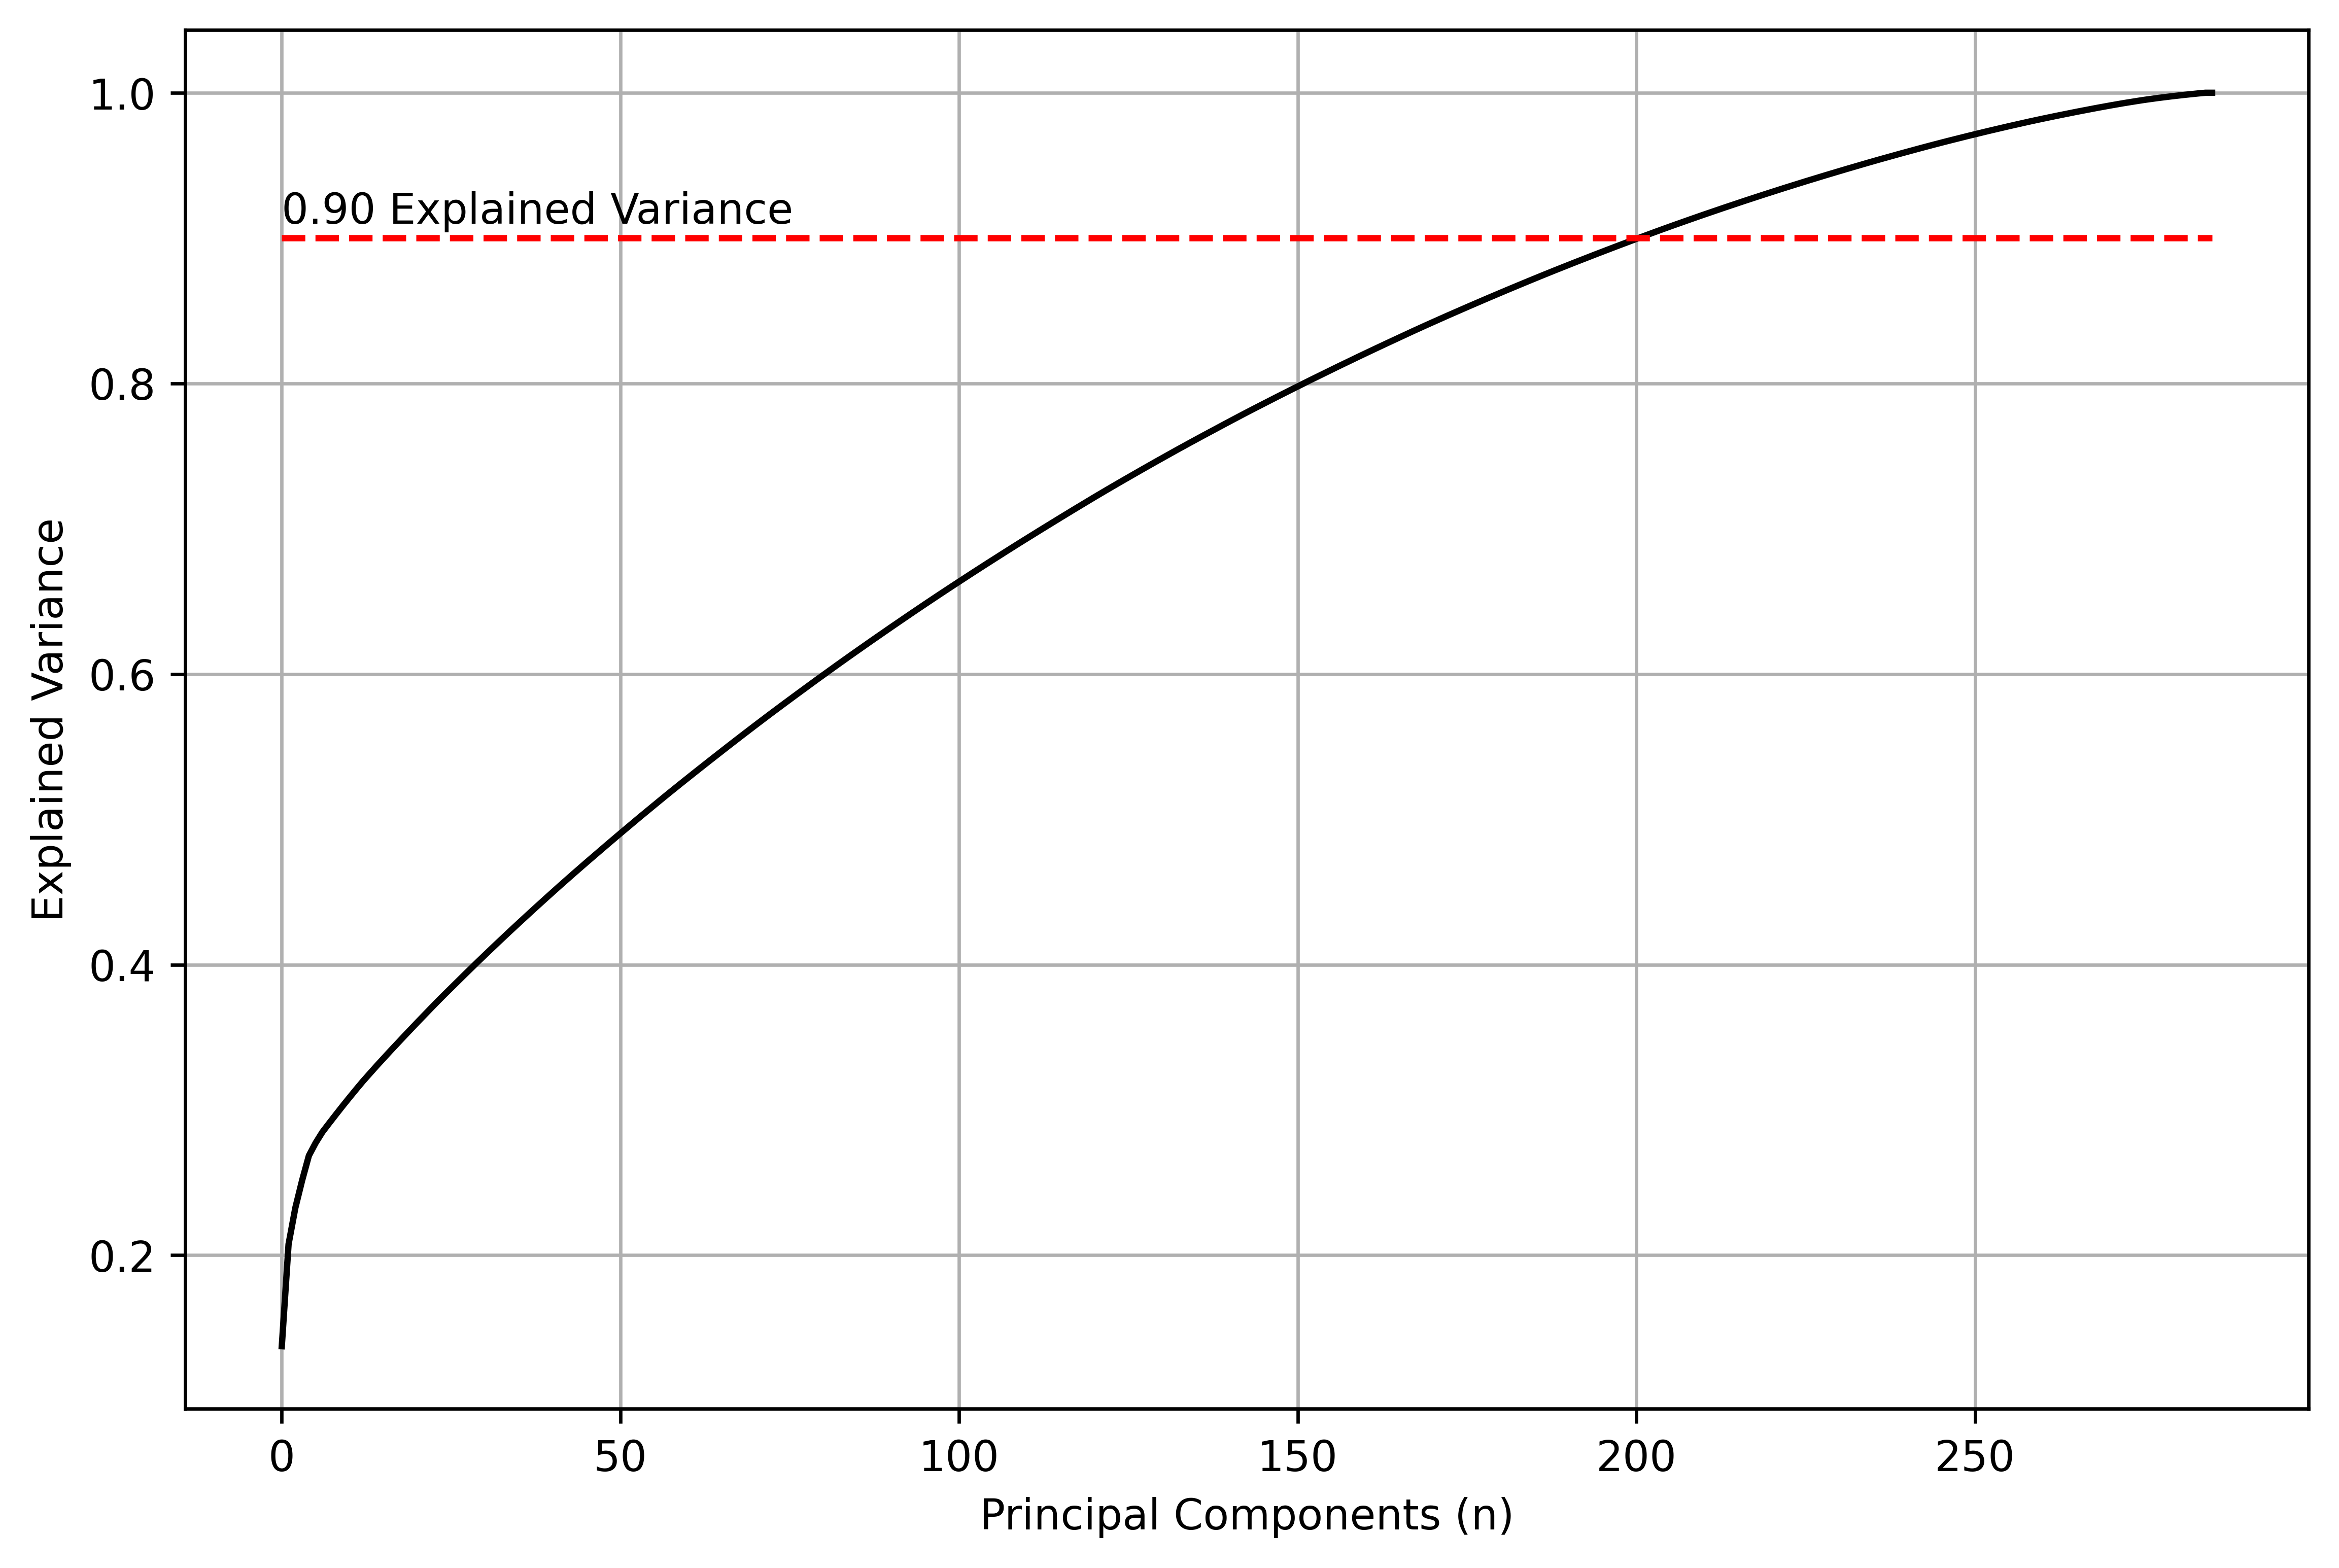

In [8]:
%matplotlib inline
# find out how many principal components are appropriate
pca.fit(df_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

#plotting explained variance vs principal components
fig1, ax1 = plt.subplots(figsize=(9,6), dpi=600)
ax1.plot(np.arange(0, 286), cumsum, color='black')
ax1.set_xlabel("Principal Components (n)")
ax1.set_ylabel("Explained Variance")
plt.hlines(0.9, 0, 285, color='red', linestyle="--")
ax1.annotate("0.90 Explained Variance", xy=(0, 0.90), xytext=(0, 0.91))
plt.grid(visible=True)
plt.show()


It looks like 90% of the variance can be explained with 200 principal components, this is a reduction from 286 features.

In [9]:
#fitting pca with 200 pc's
pca_2 = PCA(n_components=200)
df_train_pca = pca_2.fit_transform(df_train_scaled)

## Neural Network Model

For this training exercise the training data will be split between train set and validation set. A keras neural network will be used.

Before splitting the data, the target labels will need to be changed to numerical data types.

In [7]:
from sklearn.preprocessing import LabelEncoder    

In [8]:
labe = LabelEncoder()
labe.fit(train_targets)
encoded_targs = labe.transform(train_targets)

In [10]:
from sklearn.model_selection import train_test_split as tts

In [13]:
#splitting the data
X_train, X_val, y_train, y_val = tts(df_train_pca, encoded_targs, test_size=0.2, random_state=42)
print(X_train.shape)

(19200, 200)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#creating a function so gridsearch can be used
def build_model(n_hidden=1, hn_neurons=30, input_shape=[X_train.shape[1]]):
    """This function creates a neural network that classifies 10 objects and uses
    the sparse_categorical_crossentropy as the loss function, adam optimizer, and accuracy as a metric.
    ReLU is used as the activation function for the hidden layers"""
    model = Sequential()
    #input layer
    model.add(keras.layers.Dense(200, input_shape=input_shape))
    #creating hidden layers
    for layer in range(int(n_hidden)):
        model.add(keras.layers.Dense(hn_neurons, activation='relu')) #relu is specified here because it is solved fairly quickly
    #creating output layer
    model.add(keras.layers.Dense(10, activation='softmax')) # softmax was chosen for the output layer because classes are exclusive 
    #compiling model
    model.compile(loss="sparse_categorical_crossentropy", #the target labels weren't split so the target column is sparse
                 optimizer='adam', #adam is pretty good optimizer for general use
                 metrics=['accuracy'])
    return model

In [15]:
from tensorflow import keras
import sklearn

In [16]:
#wrapping up with keras model
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)

C:\Users\asefi\AppData\Local\Temp/ipykernel_6868/1391755816.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)


Now we'll use a random grid search to help tune the hyperparameters for this model.

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
parameters = {"n_hidden":[2, 3, 4, 5],
             "hn_neurons": np.arange(200, 250)}
param_search = RandomizedSearchCV(keras_class, parameters, n_iter=15, cv=4)
param_search.fit(X_train, y_train, epochs=10,
                validation_data=(X_val, y_val),
                callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/10
450/450 [==============================] - 2s 3ms/step - loss: 0.7549 - accuracy: 0.7228 - val_loss: 0.5373 - val_accuracy: 0.8096
Epoch 2/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4374 - accuracy: 0.8358 - val_loss: 0.5138 - val_accuracy: 0.8140
Epoch 3/10
450/450 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8660 - val_loss: 0.4630 - val_accuracy: 0.8392
Epoch 4/10
450/450 [==============================] - 1s 3ms/step - loss: 0.3173 - accuracy: 0.8822 - val_loss: 0.4145 - val_accuracy: 0.8560
Epoch 5/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.9026 - val_loss: 0.4825 - val_accuracy: 0.8462
Epoch 6/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2420 - accuracy: 0.9141 - val_loss: 0.3951 - val_accuracy: 0.8700
Epoch 7/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2184 - accuracy: 0.9219 - val_loss: 0.4317 - val_accuracy: 0.8515
Epoch 

Epoch 6/10
150/150 [==============================] - 0s 903us/step - loss: 0.4984 - accuracy: 0.8675
Epoch 1/10
450/450 [==============================] - 1s 2ms/step - loss: 0.8192 - accuracy: 0.7255 - val_loss: 0.5382 - val_accuracy: 0.8246
Epoch 2/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8578 - val_loss: 0.5065 - val_accuracy: 0.8217
Epoch 3/10
450/450 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8900 - val_loss: 0.4553 - val_accuracy: 0.8504
Epoch 4/10
450/450 [==============================] - 1s 2ms/step - loss: 0.2356 - accuracy: 0.9174 - val_loss: 0.4554 - val_accuracy: 0.8704
Epoch 5/10
450/450 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9256 - val_loss: 0.4593 - val_accuracy: 0.8783
Epoch 6/10
150/150 [==============================] - 0s 854us/step - loss: 0.4856 - accuracy: 0.8750
Epoch 1/10
450/450 [==============================] - 1s 2ms/step - loss: 0.7871 - acc

150/150 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.8596
Epoch 1/10
450/450 [==============================] - 2s 2ms/step - loss: 0.7936 - accuracy: 0.7386 - val_loss: 0.5902 - val_accuracy: 0.8087
Epoch 2/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8631 - val_loss: 0.5117 - val_accuracy: 0.8196
Epoch 3/10
450/450 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.8979 - val_loss: 0.4400 - val_accuracy: 0.8662
Epoch 4/10
450/450 [==============================] - 1s 2ms/step - loss: 0.2402 - accuracy: 0.9157 - val_loss: 0.4458 - val_accuracy: 0.8710
Epoch 5/10
450/450 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9274 - val_loss: 0.4745 - val_accuracy: 0.8725
Epoch 6/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8744
Epoch 1/10
450/450 [==============================] - 1s 2ms/step - loss: 0.7815 - accuracy: 0.7396 -

Epoch 3/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.8918 - val_loss: 0.4445 - val_accuracy: 0.8535
Epoch 4/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2547 - accuracy: 0.9074 - val_loss: 0.4631 - val_accuracy: 0.8565
Epoch 5/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2164 - accuracy: 0.9220 - val_loss: 0.4954 - val_accuracy: 0.8540
Epoch 6/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.8667
Epoch 1/10
450/450 [==============================] - 2s 3ms/step - loss: 0.7708 - accuracy: 0.7314 - val_loss: 0.5313 - val_accuracy: 0.8015
Epoch 2/10
450/450 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8590 - val_loss: 0.4541 - val_accuracy: 0.8383
Epoch 3/10
450/450 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8863 - val_loss: 0.4816 - val_accuracy: 0.8458
Epoch 4/10
450/450 [============================

450/450 [==============================] - 2s 4ms/step - loss: 0.1805 - accuracy: 0.9364 - val_loss: 0.4204 - val_accuracy: 0.8777
Epoch 8/10
450/450 [==============================] - 2s 4ms/step - loss: 0.1878 - accuracy: 0.9372 - val_loss: 0.4746 - val_accuracy: 0.8629
Epoch 9/10
450/450 [==============================] - 2s 4ms/step - loss: 0.1814 - accuracy: 0.9397 - val_loss: 0.4498 - val_accuracy: 0.8723
Epoch 10/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.8758
Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 0.7733 - accuracy: 0.7279 - val_loss: 0.4808 - val_accuracy: 0.8265
Epoch 2/10
450/450 [==============================] - 2s 3ms/step - loss: 0.4241 - accuracy: 0.8403 - val_loss: 0.4709 - val_accuracy: 0.8300
Epoch 3/10
450/450 [==============================] - 2s 3ms/step - loss: 0.3366 - accuracy: 0.8744 - val_loss: 0.4288 - val_accuracy: 0.8562
Epoch 4/10
450/450 [==============================] - 2s 3

450/450 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.9112 - val_loss: 0.4329 - val_accuracy: 0.8744
Epoch 5/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2222 - accuracy: 0.9176 - val_loss: 0.5395 - val_accuracy: 0.8527
Epoch 6/10
450/450 [==============================] - 1s 3ms/step - loss: 0.2050 - accuracy: 0.9265 - val_loss: 0.4962 - val_accuracy: 0.8667
Epoch 7/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.8725
Epoch 1/10
450/450 [==============================] - 2s 3ms/step - loss: 0.7892 - accuracy: 0.7253 - val_loss: 0.5630 - val_accuracy: 0.7956
Epoch 2/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8531 - val_loss: 0.4264 - val_accuracy: 0.8590
Epoch 3/10
450/450 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.8912 - val_loss: 0.4205 - val_accuracy: 0.8560
Epoch 4/10
450/450 [==============================] - 1s 3m

RandomizedSearchCV(cv=4,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CAE2250700>,
                   n_iter=15,
                   param_distributions={'hn_neurons': array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]),
                                        'n_hidden': [2, 3, 4, 5]})

In [19]:
#let's display the best parameters
print("Best parameters are\n")
print(param_search.best_params_)
print("Best score for these parameters was\n")
print(param_search.best_score_)

Best parameters are

{'n_hidden': 2, 'hn_neurons': 219}
Best score for these parameters was

0.8776562511920929


Now that the number of hidden layers and number of neurons has been determined, let's create a learning curve.

In [20]:
a_model = build_model(n_hidden=2, hn_neurons=223)
history = a_model.fit(X_train, y_train, epochs=100,
           validation_data=(X_val, y_val),
           callbacks=[EarlyStopping(patience=20)])

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.7374 - accuracy: 0.7530 - val_loss: 0.4976 - val_accuracy: 0.8296
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3883 - accuracy: 0.8668 - val_loss: 0.4483 - val_accuracy: 0.8535
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2810 - accuracy: 0.9022 - val_loss: 0.3734 - val_accuracy: 0.8729
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2238 - accuracy: 0.9221 - val_loss: 0.4180 - val_accuracy: 0.8752
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2177 - accuracy: 0.9218 - val_loss: 0.3555 - val_accuracy: 0.8879
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1636 - accuracy: 0.9421 - val_loss: 0.4079 - val_accuracy: 0.8946
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1577 - accuracy: 0.9446 - val_loss: 0.4508 - val_accuracy: 0.8869

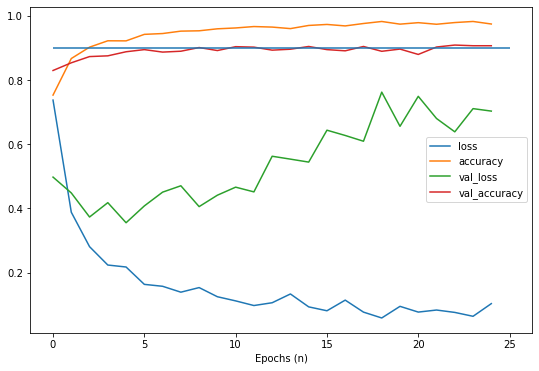

In [22]:
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(9,6))
plt.xlabel("Epochs (n)")
plt.hlines(0.9, 0, 25)
plt.show()

There's seems to be an increasing validation loss as the epochs go on.  This is due to the model overfitting the data. Regularization in a new model function will be tried to combat this.

In [23]:
#searching over the whole dataset
X_train, X_val, y_train, y_val = tts(df_train, encoded_targs, test_size=0.2, random_state=42)

In [24]:
#creating a new model function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout #adding regularizing layer
#creating a function so gridsearch can be used
def build_model2(n_hidden=1, hn_neurons=30, input_shape=[X_train.shape[1]], optimizer='adam', lr=0.001): #adding optimizer argument
    """This function creates a neural network that classifies 10 objects and uses
    the sparse_categorical_crossentropy as the loss function, 1 of 2 optimizers (nadam, adam), and accuracy as a metric.
    ReLU is used as the activation function for the hidden layers"""
    model = Sequential()
    #input layer
    model.add(keras.layers.Dense(200, input_shape=input_shape))
    #creating hidden layers
    for layer in range(int(n_hidden)):
        model.add(keras.layers.Dense(hn_neurons, activation='relu')) #relu is specified here because it is solved fairly quickly
        model.add(Dropout(rate=0.6))
    #creating output layer
    model.add(keras.layers.Dense(10, activation='softmax')) # softmax was chosen for the output layer because classes are exclusive 
    #compiling model
    opt_dict = {'adam':keras.optimizers.Adam(learning_rate=lr), 'nadam': keras.optimizers.Nadam(learning_rate=lr)}
    model.compile(loss="sparse_categorical_crossentropy", #the target labels weren't split so the target column is sparse
                 optimizer=opt_dict[optimizer], #adam is pretty good optimizer for general use
                 metrics=['accuracy'])
    return model

In [25]:
#wrapping up with keras model
keras_class2 = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model2)

C:\Users\asefi\AppData\Local\Temp/ipykernel_6868/3780386794.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_class2 = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model2)


In [26]:
parameters = {"n_hidden":[2, 3],
             "hn_neurons": np.arange(75, 140),
             "optimizer": ['adam', 'nadam'], 
              "lr": [0.001, 0.0008, 0.0005]}
param_search2 = RandomizedSearchCV(keras_class2, parameters, n_iter=10, cv=3)
param_search2.fit(X_train, y_train, epochs=100,
                validation_data=(X_val, y_val),
                callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 1.8979 - accuracy: 0.2144 - val_loss: 1.5555 - val_accuracy: 0.3196
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.4843 - accuracy: 0.3509 - val_loss: 1.2172 - val_accuracy: 0.5152
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.2729 - accuracy: 0.4305 - val_loss: 1.1030 - val_accuracy: 0.5229
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.1649 - accuracy: 0.4732 - val_loss: 1.0139 - val_accuracy: 0.5804
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.0877 - accuracy: 0.5077 - val_loss: 0.9756 - val_accuracy: 0.5625
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 1.0379 - accuracy: 0.5402 - val_loss: 0.9137 - val_accuracy: 0.5846
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 0.9834 - accuracy: 0.5549 - val_loss: 0.9012 - val_accuracy: 0.6094

400/400 [==============================] - 2s 3ms/step - loss: 1.9781 - accuracy: 0.1883 - val_loss: 1.5710 - val_accuracy: 0.3017
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 1.5196 - accuracy: 0.3345 - val_loss: 1.2507 - val_accuracy: 0.4502
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 1.3080 - accuracy: 0.4108 - val_loss: 1.1218 - val_accuracy: 0.5183
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1817 - accuracy: 0.4623 - val_loss: 1.0303 - val_accuracy: 0.5356
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1039 - accuracy: 0.5020 - val_loss: 0.9691 - val_accuracy: 0.6242
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0447 - accuracy: 0.5277 - val_loss: 0.9235 - val_accuracy: 0.6233
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0071 - accuracy: 0.5545 - val_loss: 0.8768 - val_accuracy: 0.6310
Epoch 8/100

400/400 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.8151 - val_loss: 0.5988 - val_accuracy: 0.8213
Epoch 59/100
200/200 [==============================] - 0s 1ms/step - loss: 0.6060 - accuracy: 0.8302
Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 1.8885 - accuracy: 0.2212 - val_loss: 1.4386 - val_accuracy: 0.3560
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 1.4051 - accuracy: 0.3867 - val_loss: 1.1819 - val_accuracy: 0.5263
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 1.2428 - accuracy: 0.4443 - val_loss: 1.1096 - val_accuracy: 0.5548
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1377 - accuracy: 0.4935 - val_loss: 1.0064 - val_accuracy: 0.5798
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0561 - accuracy: 0.5336 - val_loss: 0.9525 - val_accuracy: 0.6008
Epoch 6/100
400/400 [==============================]

Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0663 - accuracy: 0.5245 - val_loss: 0.9571 - val_accuracy: 0.5890
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9935 - accuracy: 0.5749 - val_loss: 0.9102 - val_accuracy: 0.6785
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9445 - accuracy: 0.6092 - val_loss: 0.8427 - val_accuracy: 0.7188
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8689 - accuracy: 0.6591 - val_loss: 0.7626 - val_accuracy: 0.7571
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8304 - accuracy: 0.6817 - val_loss: 0.7208 - val_accuracy: 0.7629
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7813 - accuracy: 0.7085 - val_loss: 0.7031 - val_accuracy: 0.7783
Epoch 11/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7523 - accuracy: 0.7271 - val_loss: 0.7048 - val_accuracy: 0.75

200/200 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.8367
Epoch 1/100
400/400 [==============================] - 1s 3ms/step - loss: 1.8803 - accuracy: 0.2352 - val_loss: 1.4243 - val_accuracy: 0.4202
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 1.4098 - accuracy: 0.3845 - val_loss: 1.1789 - val_accuracy: 0.5619
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 1.2397 - accuracy: 0.4502 - val_loss: 1.0805 - val_accuracy: 0.5548
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1528 - accuracy: 0.4940 - val_loss: 1.0278 - val_accuracy: 0.6402
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0480 - accuracy: 0.5529 - val_loss: 0.8994 - val_accuracy: 0.6967
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9688 - accuracy: 0.6066 - val_loss: 0.8179 - val_accuracy: 0.7467
Epoch 7/100
400/400 [==============================] 

Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7722 - accuracy: 0.7009 - val_loss: 0.6922 - val_accuracy: 0.7367
Epoch 11/100
400/400 [==============================] - 1s 3ms/step - loss: 0.7516 - accuracy: 0.7055 - val_loss: 0.6463 - val_accuracy: 0.7794
Epoch 12/100
400/400 [==============================] - 1s 3ms/step - loss: 0.7295 - accuracy: 0.7287 - val_loss: 0.6527 - val_accuracy: 0.7648
Epoch 13/100
400/400 [==============================] - 1s 3ms/step - loss: 0.7157 - accuracy: 0.7317 - val_loss: 0.6328 - val_accuracy: 0.7790
Epoch 14/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6980 - accuracy: 0.7455 - val_loss: 0.6330 - val_accuracy: 0.7983
Epoch 15/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6788 - accuracy: 0.7532 - val_loss: 0.6411 - val_accuracy: 0.7875
Epoch 16/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6582 - accuracy: 0.7662 - val_loss: 0.6299 - val_accuracy:

400/400 [==============================] - 1s 2ms/step - loss: 0.7657 - accuracy: 0.6656 - val_loss: 0.7680 - val_accuracy: 0.7342
Epoch 17/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7557 - accuracy: 0.6687 - val_loss: 0.6966 - val_accuracy: 0.7679
Epoch 18/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7289 - accuracy: 0.6890 - val_loss: 0.7906 - val_accuracy: 0.7398
Epoch 19/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7393 - accuracy: 0.6923 - val_loss: 0.7709 - val_accuracy: 0.7440
Epoch 20/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7064 - accuracy: 0.7081 - val_loss: 0.6503 - val_accuracy: 0.7881
Epoch 21/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.7198 - val_loss: 0.6823 - val_accuracy: 0.7721
Epoch 22/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.7395 - val_loss: 0.6316 - val_accuracy: 0.7935
Epoch

Epoch 76/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.8001 - val_loss: 0.7253 - val_accuracy: 0.8104
Epoch 77/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.8029 - val_loss: 0.6945 - val_accuracy: 0.8285
Epoch 78/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.8055 - val_loss: 0.7209 - val_accuracy: 0.8238
Epoch 79/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.8054 - val_loss: 0.7069 - val_accuracy: 0.8360
Epoch 80/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5480 - accuracy: 0.8063 - val_loss: 0.7011 - val_accuracy: 0.8338
Epoch 81/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.8061 - val_loss: 0.7117 - val_accuracy: 0.8313
Epoch 82/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.8032 - val_loss: 0.7556 - val_accuracy:

400/400 [==============================] - 1s 2ms/step - loss: 0.9595 - accuracy: 0.5691 - val_loss: 0.8625 - val_accuracy: 0.6938
Epoch 13/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9343 - accuracy: 0.5811 - val_loss: 0.8518 - val_accuracy: 0.6677
Epoch 14/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9177 - accuracy: 0.5941 - val_loss: 0.8413 - val_accuracy: 0.6446
Epoch 15/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8976 - accuracy: 0.6064 - val_loss: 0.8002 - val_accuracy: 0.7038
Epoch 16/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8801 - accuracy: 0.6209 - val_loss: 0.7915 - val_accuracy: 0.7321
Epoch 17/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8637 - accuracy: 0.6331 - val_loss: 0.7848 - val_accuracy: 0.7110
Epoch 18/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8454 - accuracy: 0.6495 - val_loss: 0.7502 - val_accuracy: 0.7156
Epoch

Epoch 69/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.8083 - val_loss: 0.6273 - val_accuracy: 0.8235
Epoch 70/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.8067 - val_loss: 0.6138 - val_accuracy: 0.8223
Epoch 71/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.8097 - val_loss: 0.6137 - val_accuracy: 0.8252
Epoch 72/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5445 - accuracy: 0.8103 - val_loss: 0.6168 - val_accuracy: 0.8310
Epoch 73/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.8097 - val_loss: 0.6254 - val_accuracy: 0.8346
Epoch 74/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5601 - accuracy: 0.8052 - val_loss: 0.6196 - val_accuracy: 0.8231
Epoch 75/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.8154 - val_loss: 0.6483 - val_accuracy:

400/400 [==============================] - 1s 2ms/step - loss: 0.4623 - accuracy: 0.8377 - val_loss: 0.5614 - val_accuracy: 0.8410
Epoch 51/100
200/200 [==============================] - 0s 971us/step - loss: 0.5900 - accuracy: 0.8431
Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 1.8664 - accuracy: 0.2318 - val_loss: 1.3934 - val_accuracy: 0.3733
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 1.3944 - accuracy: 0.3841 - val_loss: 1.1942 - val_accuracy: 0.4519
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 1.2385 - accuracy: 0.4370 - val_loss: 1.0771 - val_accuracy: 0.5321
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1433 - accuracy: 0.4820 - val_loss: 1.0145 - val_accuracy: 0.6481
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0778 - accuracy: 0.5218 - val_loss: 0.9619 - val_accuracy: 0.6217
Epoch 6/100
400/400 [=============================

Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.1013 - accuracy: 0.5099 - val_loss: 0.9690 - val_accuracy: 0.6102
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0495 - accuracy: 0.5270 - val_loss: 0.9234 - val_accuracy: 0.5965
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0107 - accuracy: 0.5446 - val_loss: 0.9207 - val_accuracy: 0.6073
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9894 - accuracy: 0.5533 - val_loss: 0.8887 - val_accuracy: 0.6606
Epoch 9/100
400/400 [==============================] - 1s 3ms/step - loss: 0.9588 - accuracy: 0.5684 - val_loss: 0.8417 - val_accuracy: 0.6721
Epoch 10/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9341 - accuracy: 0.5837 - val_loss: 0.8090 - val_accuracy: 0.6600
Epoch 11/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9073 - accuracy: 0.5958 - val_loss: 0.8320 - val_accuracy: 0.65

400/400 [==============================] - 1s 2ms/step - loss: 0.7509 - accuracy: 0.7148 - val_loss: 0.6462 - val_accuracy: 0.7979
Epoch 22/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7572 - accuracy: 0.7127 - val_loss: 0.6395 - val_accuracy: 0.7973
Epoch 23/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7251 - accuracy: 0.7282 - val_loss: 0.6493 - val_accuracy: 0.7998
Epoch 24/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7259 - accuracy: 0.7340 - val_loss: 0.7042 - val_accuracy: 0.7773
Epoch 25/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7258 - accuracy: 0.7359 - val_loss: 0.6127 - val_accuracy: 0.8110
Epoch 26/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7118 - accuracy: 0.7419 - val_loss: 0.6136 - val_accuracy: 0.8129
Epoch 27/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7026 - accuracy: 0.7455 - val_loss: 0.6092 - val_accuracy: 0.8219
Epoch

400/400 [==============================] - 1s 2ms/step - loss: 1.2165 - accuracy: 0.4512 - val_loss: 1.0744 - val_accuracy: 0.5698
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0987 - accuracy: 0.4993 - val_loss: 0.9639 - val_accuracy: 0.5794
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.0243 - accuracy: 0.5370 - val_loss: 0.8785 - val_accuracy: 0.6525
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9557 - accuracy: 0.5703 - val_loss: 0.8586 - val_accuracy: 0.6831
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.9096 - accuracy: 0.5920 - val_loss: 0.7995 - val_accuracy: 0.6610
Epoch 8/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8721 - accuracy: 0.6208 - val_loss: 0.7490 - val_accuracy: 0.7396
Epoch 9/100
400/400 [==============================] - 1s 2ms/step - loss: 0.8401 - accuracy: 0.6486 - val_loss: 0.7212 - val_accuracy: 0.7585
Epoch 10/10

400/400 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8439 - val_loss: 0.5683 - val_accuracy: 0.8250
Epoch 61/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.8419 - val_loss: 0.5810 - val_accuracy: 0.8406
Epoch 62/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8456 - val_loss: 0.6707 - val_accuracy: 0.7973
Epoch 63/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8448 - val_loss: 0.6009 - val_accuracy: 0.8302
Epoch 64/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4228 - accuracy: 0.8481 - val_loss: 0.5646 - val_accuracy: 0.8492
Epoch 65/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8518 - val_loss: 0.5520 - val_accuracy: 0.8535
Epoch 66/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8470 - val_loss: 0.6369 - val_accuracy: 0.8233
Epoch

400/400 [==============================] - 1s 3ms/step - loss: 0.6368 - accuracy: 0.7698 - val_loss: 0.6384 - val_accuracy: 0.8027
Epoch 33/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6141 - accuracy: 0.7785 - val_loss: 0.6786 - val_accuracy: 0.7740
Epoch 34/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6220 - accuracy: 0.7768 - val_loss: 0.6713 - val_accuracy: 0.7848
Epoch 35/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6105 - accuracy: 0.7792 - val_loss: 0.6503 - val_accuracy: 0.7962
Epoch 36/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6216 - accuracy: 0.7855 - val_loss: 0.6400 - val_accuracy: 0.8202
Epoch 37/100
400/400 [==============================] - 1s 3ms/step - loss: 0.6100 - accuracy: 0.7897 - val_loss: 0.6543 - val_accuracy: 0.8092
Epoch 38/100
400/400 [==============================] - 1s 3ms/step - loss: 0.5852 - accuracy: 0.8001 - val_loss: 0.6249 - val_accuracy: 0.8125
Epoch

Epoch 79/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4846 - accuracy: 0.8321 - val_loss: 0.5773 - val_accuracy: 0.8352
Epoch 80/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4766 - accuracy: 0.8333 - val_loss: 0.5751 - val_accuracy: 0.8452
Epoch 81/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4871 - accuracy: 0.8309 - val_loss: 0.5971 - val_accuracy: 0.8358
Epoch 82/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4958 - accuracy: 0.8308 - val_loss: 0.5770 - val_accuracy: 0.8410
Epoch 83/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4865 - accuracy: 0.8349 - val_loss: 0.5721 - val_accuracy: 0.8396
Epoch 84/100
200/200 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.8314
Epoch 1/100
400/400 [==============================] - 2s 3ms/step - loss: 2.0342 - accuracy: 0.1761 - val_loss: 1.6345 - val_accuracy: 0.2298
Epoch 2/100
400/400 [==============

400/400 [==============================] - 1s 2ms/step - loss: 0.6216 - accuracy: 0.7924 - val_loss: 0.6339 - val_accuracy: 0.8160
Epoch 34/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6152 - accuracy: 0.7919 - val_loss: 0.6165 - val_accuracy: 0.8244
Epoch 35/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6101 - accuracy: 0.7920 - val_loss: 0.6548 - val_accuracy: 0.7985
Epoch 36/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6252 - accuracy: 0.7883 - val_loss: 0.6031 - val_accuracy: 0.8219
Epoch 37/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6049 - accuracy: 0.7898 - val_loss: 0.6357 - val_accuracy: 0.8275
Epoch 38/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6002 - accuracy: 0.7897 - val_loss: 0.6173 - val_accuracy: 0.8235
Epoch 39/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5936 - accuracy: 0.7955 - val_loss: 0.6214 - val_accuracy: 0.8231
Epoch

400/400 [==============================] - 1s 2ms/step - loss: 0.6248 - accuracy: 0.7796 - val_loss: 0.5837 - val_accuracy: 0.8317
Epoch 31/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6400 - accuracy: 0.7791 - val_loss: 0.6063 - val_accuracy: 0.8085
Epoch 32/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6109 - accuracy: 0.7859 - val_loss: 0.5913 - val_accuracy: 0.8240
Epoch 33/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6154 - accuracy: 0.7824 - val_loss: 0.5849 - val_accuracy: 0.8150
Epoch 34/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.7841 - val_loss: 0.5836 - val_accuracy: 0.8246
Epoch 35/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6080 - accuracy: 0.7876 - val_loss: 0.6713 - val_accuracy: 0.7721
Epoch 36/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6099 - accuracy: 0.7860 - val_loss: 0.5519 - val_accuracy: 0.8313
Epoch

400/400 [==============================] - 1s 2ms/step - loss: 0.5769 - accuracy: 0.7991 - val_loss: 0.5809 - val_accuracy: 0.8302
Epoch 38/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5731 - accuracy: 0.8025 - val_loss: 0.6591 - val_accuracy: 0.8094
Epoch 39/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.8068 - val_loss: 0.6299 - val_accuracy: 0.7929
Epoch 40/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5667 - accuracy: 0.8064 - val_loss: 0.6096 - val_accuracy: 0.8179
Epoch 41/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5687 - accuracy: 0.8063 - val_loss: 0.6218 - val_accuracy: 0.8117
Epoch 42/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.8130 - val_loss: 0.6224 - val_accuracy: 0.8310
Epoch 43/100
400/400 [==============================] - 1s 2ms/step - loss: 0.5626 - accuracy: 0.8108 - val_loss: 0.6368 - val_accuracy: 0.8135
Epoch

600/600 [==============================] - 2s 3ms/step - loss: 0.4952 - accuracy: 0.8242 - val_loss: 0.4709 - val_accuracy: 0.8583
Epoch 37/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4858 - accuracy: 0.8294 - val_loss: 0.5043 - val_accuracy: 0.8419
Epoch 38/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4831 - accuracy: 0.8290 - val_loss: 0.4989 - val_accuracy: 0.8433
Epoch 39/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4926 - accuracy: 0.8247 - val_loss: 0.4864 - val_accuracy: 0.8502
Epoch 40/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4830 - accuracy: 0.8307 - val_loss: 0.5006 - val_accuracy: 0.8408
Epoch 41/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4868 - accuracy: 0.8318 - val_loss: 0.4977 - val_accuracy: 0.8352
Epoch 42/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4695 - accuracy: 0.8328 - val_loss: 0.4947 - val_accuracy: 0.8442
Epoch

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CA8D8D30D0>,
                   param_distributions={'hn_neurons': array([ 75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
                                        'lr': [0.001, 0.0008, 0.0005],
                                        'n_hidden': [2, 3],
                                        'optimizer': ['adam', 'nadam']})

In [27]:
#let's display the best parameters
print("Best parameters are\n")
print(param_search2.best_params_)
print("Best score for these parameters was\n")
print(param_search2.best_score_)

Best parameters are

{'optimizer': 'adam', 'n_hidden': 3, 'lr': 0.0008, 'hn_neurons': 134}
Best score for these parameters was

0.8501041730244955


In [28]:
b_model = build_model2(n_hidden=param_search2.best_params_['n_hidden'], 
                       hn_neurons=param_search2.best_params_['hn_neurons'],
                       optimizer=param_search2.best_params_['optimizer'],
                      lr=param_search2.best_params_['lr'])
historyb = b_model.fit(X_train, y_train, epochs=100,
           validation_data=(X_val, y_val))

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 1.7469 - accuracy: 0.2626 - val_loss: 1.2544 - val_accuracy: 0.4842
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 1.2691 - accuracy: 0.4307 - val_loss: 1.0778 - val_accuracy: 0.5181
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 1.1037 - accuracy: 0.5021 - val_loss: 0.9305 - val_accuracy: 0.5835
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0079 - accuracy: 0.5446 - val_loss: 0.9056 - val_accuracy: 0.6160
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.9320 - accuracy: 0.5782 - val_loss: 0.7835 - val_accuracy: 0.6640
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.8938 - accuracy: 0.5936 - val_loss: 0.7612 - val_accuracy: 0.6621
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.8453 - accuracy: 0.6252 - val_loss: 0.7479 - val_accuracy: 0.6587

Epoch 58/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4404 - accuracy: 0.8452 - val_loss: 0.4812 - val_accuracy: 0.8440
Epoch 59/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4515 - accuracy: 0.8428 - val_loss: 0.4857 - val_accuracy: 0.8440
Epoch 60/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4438 - accuracy: 0.8435 - val_loss: 0.4747 - val_accuracy: 0.8556
Epoch 61/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4413 - accuracy: 0.8434 - val_loss: 0.4760 - val_accuracy: 0.8556
Epoch 62/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4382 - accuracy: 0.8476 - val_loss: 0.4659 - val_accuracy: 0.8583
Epoch 63/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4391 - accuracy: 0.8430 - val_loss: 0.4654 - val_accuracy: 0.8546
Epoch 64/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4301 - accuracy: 0.8458 - val_loss: 0.4775 - val_accuracy:

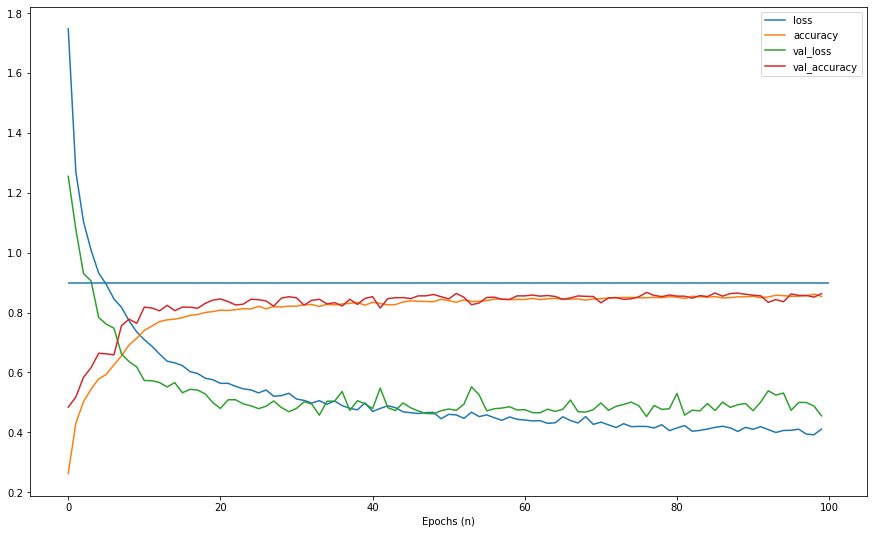

In [29]:
%matplotlib inline
pd.DataFrame(historyb.history).plot(figsize=(15,9))
plt.xlabel("Epochs (n)")
plt.hlines(0.9, 0, 100) 
plt.show()

It seems as though the two neural networks don't perform as well as they could.  A couple things to try moving forward.
    
    1. A 2nd (or 3rd) dimensionality reduction technique
    
    2. Decision trees to replace the NN

### Trying t-SNE

In [11]:
from sklearn.manifold import TSNE

In [12]:
#instantiating tsne
tsne = TSNE(n_components=3, learning_rate=25, perplexity=300.0, random_state=1)

In [13]:
transformed = tsne.fit_transform(df_train_scaled)

C:\Users\asefi\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [11]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [12]:
xs = transformed
dfxs = pd.DataFrame(xs)
ys = train_targets
dfxs['targets'] = ys.tolist()
dfxs.rename(columns={0: "X1", 1:"X2", 2: "X3"}, inplace=True)

Let's plot the feature space and give labels to the data points.

C:\Users\asefi\AppData\Local\Temp/ipykernel_6868/4070926668.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axed = Axes3D(fig3d)


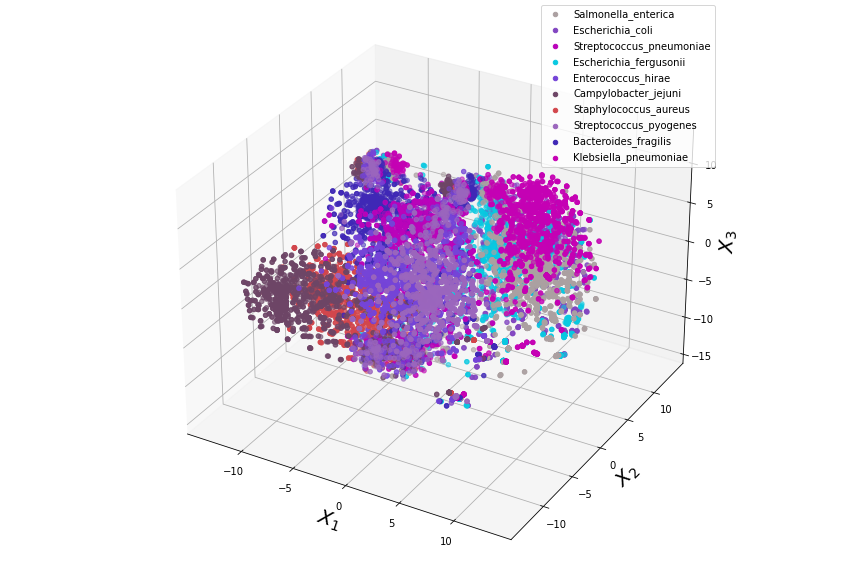

In [35]:
%matplotlib widget
# creating figure
from random import randint
colors = []
j = 0
n = 10
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF)) #choosing a random color to represent the target
fig3d = plt.figure(figsize=(12,8))
axed = Axes3D(fig3d)
for i in dfxs['targets'].unique():
    df_int = dfxs.loc[dfxs['targets'] == i]
    # creating the plot
    three_d_plot = axed.scatter(df_int["X1"], df_int["X2"], df_int["X3"], c=colors[j], label=i )
    j += 1
    # setting title and labels
axed.set_title("3D plot of Feature Space")
axed.set_xlabel('$X_{1}$', fontsize=20)
axed.set_ylabel('$X_{2}$', fontsize=20)
axed.set_zlabel('$X_{3}$', fontsize=20)
axed.legend()
axed.grid(True)
plt.show()

The data show t-SNE can decently group the data while only using 3 components. But there seems to be a bit of mixing that could lead to inacurracy. 

In [14]:
#tsne dataset
X_train_tsne, X_val_tsne, y_train_tsne, y_val_tsne = tts(transformed, encoded_targs, test_size=0.2, random_state=42)
seed=1

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
rnd_clf = RandomForestClassifier(n_jobs=-1)
parameters4 = {"n_estimators": np.arange(450, 550, 10),
    "max_depth":np.arange(2,20, 2),
              "criterion": ["gini", "entropy", "log_loss"]}
param_search4 = RandomizedSearchCV(rnd_clf, parameters4, n_iter=10, cv=3, random_state=seed)
param_search4.fit(X_train_tsne, y_train_tsne)

print(param_search4.best_params_)
print(param_search4.best_score_)

C:\Users\asefi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\asefi\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\asefi\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\asefi\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    retur

{'n_estimators': 520, 'max_depth': 18, 'criterion': 'entropy'}
0.894375


In [17]:
rnd_clf = RandomForestClassifier(n_estimators=param_search4.best_params_['n_estimators'], 
                                 criterion=param_search4.best_params_['criterion'], 
                                 max_depth=param_search4.best_params_['max_depth'], 
                                 n_jobs=-1)
rnd_clf.fit(X_train_tsne, y_train_tsne)
y_pred_clf = rnd_clf.predict(X_val_tsne)
accuracy = accuracy_score(y_val_tsne, y_pred_clf)

print("{}% accuracy is given by the randomforest regressor".format(round(accuracy*100,1)))


91.0% accuracy is given by the randomforest regressor


Let's visualize the confusion matrix now.

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
le_dict = dict(zip(labe.transform(labe.classes_), labe.classes_))

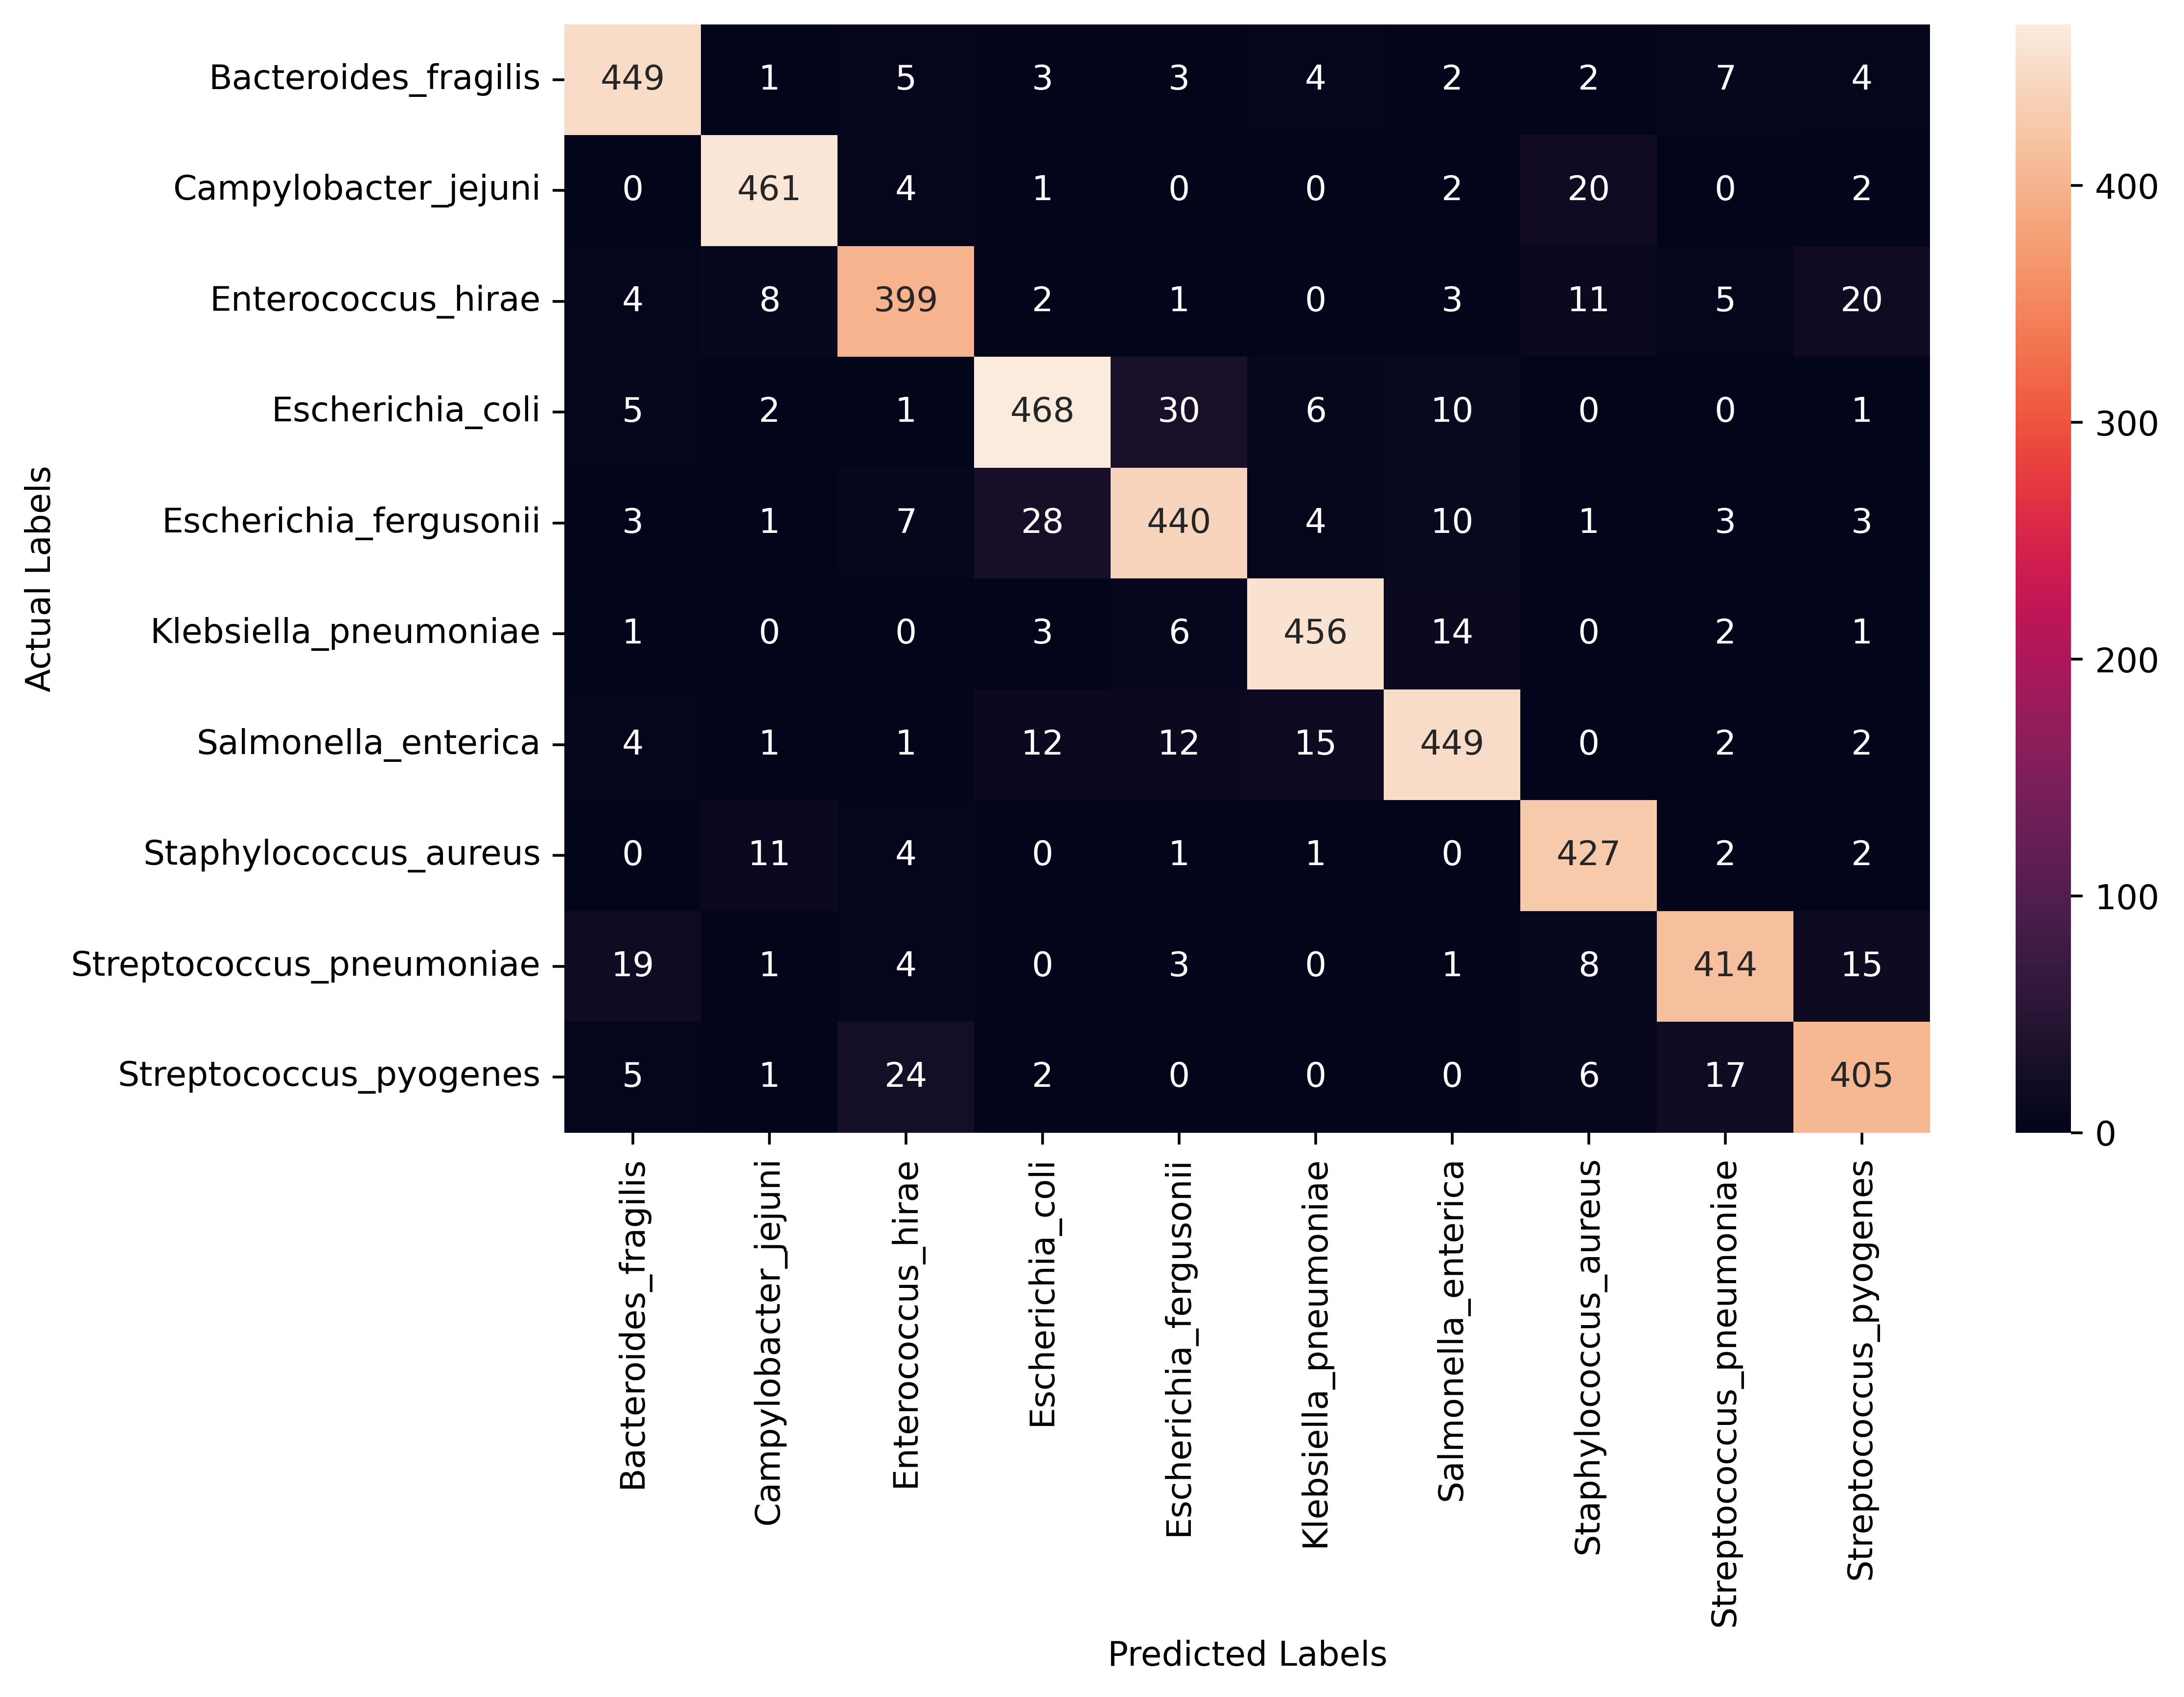

In [20]:
%matplotlib inline
conf_mtx = confusion_matrix(y_val_tsne, y_pred_clf)
cm_df = pd.DataFrame(conf_mtx)
cm_df.rename(columns=le_dict, inplace=True)
cm_df['Actual Values'] = le_dict.values()
cm_df.set_index("Actual Values", inplace=True, drop=True)
fig_mtx, ax_mtx = plt.subplots(figsize=(9,6), dpi=500)
sns.heatmap(cm_df, annot=True, fmt="g", ax=ax_mtx)
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# Discussion

The data provided included 286 variable features containing genetic information, 1 feature called row ID, and 1 feature that contained the bacteria classes.  In total there were 10 classes of bacteria with a total of 23,999 instances.  


The data in can be considered sparse, as many features contain 0.  Therefore, the data was standardized by dividing the difference between the feature mean and the actual instance value then dividing by the feature standard deviation. This was done to to ensure 1 feature of data does not overinfluence the explained variability when attempting to perform dimensionality reduction. 


Initially, to reduce the complexity of the data, dimensionality reduction using principal component analysis (PCA) was used prior to model training. The number of features that explained 90% variance was determined to be 200, however, this dataset was still fairly complex. Two neural network models were constructed, the first being simpler in terms of input variables. The second allowed for more flexibility by increasing the number of variables that can be changed. However, both models proved to be too complex no matter which variables provided the highest accuracy (88%). It turned out that the despite having a high accuracy the "best" set of parameters would continuously overtrain the data, and lead to increased loss in the validation set. Therefore a new dimensionality technique and classifier model was used. 

A discussion with colleagues yielded that t-SNE might provide a better reduced dataset. As before, the standardized dataset was transformed using t-SNE down to 3 dimensions. Initially, 2 dimensiones were used but since 2 classes of bacteria (Excherichia fergusonii, and Escherichia coli) were shown to have significant overlap with the data was plotted. To reduce this overlap, a 3rd dimension was implemented to add more variability.


The final model used was an ensemble random forest classifier that uses several decision trees and different bootstrap samples to train each decision tree. The results yielded a 91% accuracy with the biggest contribution to the loss surrounding the classification of the 2 aforementioned classes.  